# Final Project - Clustering COVID-19 World Vaccination Progress (Daily and Total Vaccination for COVID-19 in the World) using k-means
by PYTN047ONL006-JUNDA LUTFI FALASTIAN

## Pengenalan

LATAR BELAKANG

    Pandemi Covid-19 sudah menyerang lebih dari satu tahun. Banyak korban berjatuhan tidak mengenal usia. Data per-1 Februari 2021 sudah ada 103 juta kasus dimana jumlah yang sudah meninggal sekitar 2,23 juta. Trend kasus terus meningkat sejalan dengan berjalannya waktu. Kasus yang terus meningkat, dapat dicegah dengan proses vaksin. Proses vaksin sudah dilakukan di beberapa negara mulai akhir tahun 2020 sampai saat ini. Proses vaksin yang dilakukan, perlu dilihat dari sisi progress, sehingga dapat dikelompokkan mana negara yang sudah berjalan dengan progress cepat, dan mana yang masuh lambat. Proses pengelompokan menggunakan metode k-means, negara dengan kelompok progress yang lambat akan diberikan perlakuan lebih sehingga dapat meningkatkan progress vaksinasi dengan harapan dapat menurunkan kasus Covid-19.

DATA YANG DIGUNAKAN

    Data yang digunakan adalah dataset COVID-19 World Vaccination Progress Daily and Total Vaccination for COVID-19 in the World yang diambil dari https://www.kaggle.com/gpreda/covid-world-vaccination-progress.
Jumlah data 1502 baris dengan paramater data diantaranya:
1. country
2. iso_code
3. date
4. total_vaccinations
5. people_vaccinated
6. people_fully_vaccinated
7. daily_vaccinations_raw
8. daily_vaccinations
9. total_vaccinations_per_hundred
10. people_vaccinated_per_hundred
11. people_fully_vaccinated_per_hundred
12. daily_vaccinations_per_million
13. vaccines
14. source_name
15. source_website

OBJECTIVE

   Objective dari final project ini adalah mengelompokkan negara/wilayah yang sudah melakukan vaksinasi dari parameter data yang ditampilkan. Pengelompokkan menggunakan metode k-means. Negara/wilayah dengan progress yang lambat, akan diberikan perlakuan kusus sehingga dapat mempercepat progress vaksinasi dengan outcome jumlah kasus semakin menurun.

## Import Pustaska yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Data Loading & Exploratory Data Analysis

Mengambil data dari folder dataset

In [2]:
cov_data = pd.read_csv('./dataset/country_vaccinations.csv')

melihat data secara keseluruhan, terlihat terdapat 1502 rows dan 15 columns diman masih terdapat data NaN. Data NaN dalah data yg berisi angka 0, data ini akan diolah saat proses prepocessing

In [3]:
cov_data 

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,Wales,NaN,2021-01-20,190831.0,190435.0,396.0,14645.0,11105.0,6.05,6.04,0.01,3522.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1498,Wales,NaN,2021-01-21,212732.0,212317.0,415.0,21901.0,12318.0,6.75,6.73,0.01,3907.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1499,Wales,NaN,2021-01-22,241016.0,240547.0,469.0,28284.0,15148.0,7.64,7.63,0.01,4804.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1500,Wales,NaN,2021-01-23,265054.0,264538.0,516.0,24038.0,17371.0,8.41,8.39,0.02,5510.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Membuat deskripsi pada data, dimana mengambil nilai dari:
1. count
2. mean
3. std
4. min
5. 25%
6. 50%
7. 75%
8. max

data yang diambil dari kolom:
1. total_vaccinations
2. people_vaccinated
3. people_fully_vaccinated
4. daily_vaccinations_raw
5. daily_vaccinations
6. total_vaccinations_per_hundred
7. people_vaccinated_per_hundred
8. people_fully_vaccinated_per_hundred
9. daily_vaccinations_per_million

In [4]:
cov_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.017000e+03,9.650000e+02,2.980000e+02,8.270000e+02,1.442000e+03,1017.000000,965.000000,298.000000,1442.000000
mean,6.444783e+05,6.097208e+05,1.679639e+05,4.918421e+04,4.334959e+04,2.657266,2.525834,0.643926,1525.589459
std,2.057426e+06,1.849519e+06,4.578437e+05,1.384141e+05,1.165367e+05,5.502249,4.912769,1.729458,3269.660451
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.743500e+04,1.776700e+04,1.887000e+03,1.621500e+03,1.659750e+03,0.260000,0.260000,0.012500,269.000000
50%,7.103000e+04,7.527600e+04,8.407000e+03,7.759000e+03,5.567000e+03,0.850000,0.850000,0.070000,666.500000
75%,3.096200e+05,3.382520e+05,1.011120e+05,3.785100e+04,2.797975e+04,2.060000,2.050000,0.657500,1122.000000
max,2.273424e+07,1.925228e+07,3.346390e+06,1.561585e+06,1.126251e+06,44.880000,30.770000,14.110000,30869.000000


## Data Prepocessing

Output dari prepocessing ini adalah mengganti data NaN dg 0 dan mengambil data untuk kolom:
1. total_vaccinations
2. people_vaccinated
3. people_fully_vaccinated
4. daily_vaccinations_raw
5. daily_vaccinations
6. total_vaccinations_per_hundred
7. people_vaccinated_per_hundred
8. people_fully_vaccinated_per_hundred
9. daily_vaccinations_per_million
kemudian data itu yang akan digunakan sebagai proses clustering dengan metode k-means

mentranspose variabel cov_data

In [5]:
dt=cov_data.transpose()

In [6]:
dt

,0,1,2,3,4,5,6,7,8,9,...,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501
country,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,...,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales
iso_code,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,...,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24
total_vaccinations,700,NaN,32013,NaN,NaN,NaN,39599,NaN,NaN,NaN,...,NaN,NaN,151938,162197,176186,190831,212732,241016,265054,271376
people_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,151737,161932,175816,190435,212317,240547,264538,270833
people_fully_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,201,265,370,396,415,469,516,543
daily_vaccinations_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10259,13989,14645,21901,28284,24038,6322
daily_vaccinations,NaN,15656,15656,11070,8776,7400,6483,7984,8173,8363,...,8460,8931,9403,10123,10672,11105,12318,15148,17371,17063
total_vaccinations_per_hundred,0,NaN,0.07,NaN,NaN,NaN,0.09,NaN,NaN,NaN,...,NaN,NaN,4.82,5.14,5.59,6.05,6.75,7.64,8.41,8.61
people_vaccinated_per_hundred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.81,5.14,5.58,6.04,6.73,7.63,8.39,8.59


Mengambil baris ke-3 sampai baris ke-12

In [7]:
dt1=dt.iloc[3:12]

proses mentranspose ulang

In [8]:
dt1.transpose()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,700,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,15656,NaN,NaN,NaN,346
2,32013,NaN,NaN,NaN,15656,0.07,NaN,NaN,346
3,NaN,NaN,NaN,NaN,11070,NaN,NaN,NaN,245
4,NaN,NaN,NaN,NaN,8776,NaN,NaN,NaN,194
...,...,...,...,...,...,...,...,...,...
1497,190831,190435,396,14645,11105,6.05,6.04,0.01,3522
1498,212732,212317,415,21901,12318,6.75,6.73,0.01,3907
1499,241016,240547,469,28284,15148,7.64,7.63,0.01,4804
1500,265054,264538,516,24038,17371,8.41,8.39,0.02,5510


In [9]:
data_cov_fix=dt1.transpose()

data yang siambil sudah sesuai dengan yang diinginkan, yaitu mengambil kolom:
1. total_vaccinations
2. people_vaccinated
3. people_fully_vaccinated
4. daily_vaccinations_raw
5. daily_vaccinations
6. total_vaccinations_per_hundred
7. people_vaccinated_per_hundred
8. people_fully_vaccinated_per_hundred
9. daily_vaccinations_per_million

nama dataset yang digunakan adalah data_cov_fix

In [10]:
data_cov_fix

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,700,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,15656,NaN,NaN,NaN,346
2,32013,NaN,NaN,NaN,15656,0.07,NaN,NaN,346
3,NaN,NaN,NaN,NaN,11070,NaN,NaN,NaN,245
4,NaN,NaN,NaN,NaN,8776,NaN,NaN,NaN,194
...,...,...,...,...,...,...,...,...,...
1497,190831,190435,396,14645,11105,6.05,6.04,0.01,3522
1498,212732,212317,415,21901,12318,6.75,6.73,0.01,3907
1499,241016,240547,469,28284,15148,7.64,7.63,0.01,4804
1500,265054,264538,516,24038,17371,8.41,8.39,0.02,5510


Mengecek data yang masih NaN (NaN adalah data yg harusnya bernilai 0, namun terbaca NaN)

In [11]:
data_cov_fix['daily_vaccinations_per_million']

0        NaN
1        346
2        346
3        245
4        194
        ... 
1497    3522
1498    3907
1499    4804
1500    5510
1501    5412
Name: daily_vaccinations_per_million, Length: 1502, dtype: object

In [12]:
data_cov_fix['daily_vaccinations_per_million'].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
1497    False
1498    False
1499    False
1500    False
1501    False
Name: daily_vaccinations_per_million, Length: 1502, dtype: bool

Merubah data NaN menajdi 0 (karena kalau dilihat datanya, NaN adalah 0)

In [13]:
data_cov_fix['total_vaccinations'].fillna(0,inplace=True)
data_cov_fix['people_vaccinated'].fillna(0,inplace=True)
data_cov_fix['people_fully_vaccinated'].fillna(0,inplace=True)
data_cov_fix['daily_vaccinations_raw'].fillna(0,inplace=True)
data_cov_fix['daily_vaccinations'].fillna(0,inplace=True)
data_cov_fix['total_vaccinations_per_hundred'].fillna(0,inplace=True)
data_cov_fix['people_vaccinated_per_hundred'].fillna(0,inplace=True)
data_cov_fix['people_fully_vaccinated_per_hundred'].fillna(0,inplace=True)
data_cov_fix['daily_vaccinations_per_million'].fillna(0,inplace=True)

Tampilan dataset setalah NaN dirbah menjadi 0

In [14]:
data_cov_fix

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,700.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,0.0,0.0,0.0,0.0,15656.0,0.00,0.00,0.00,346.0
2,32013.0,0.0,0.0,0.0,15656.0,0.07,0.00,0.00,346.0
3,0.0,0.0,0.0,0.0,11070.0,0.00,0.00,0.00,245.0
4,0.0,0.0,0.0,0.0,8776.0,0.00,0.00,0.00,194.0
...,...,...,...,...,...,...,...,...,...
1497,190831.0,190435.0,396.0,14645.0,11105.0,6.05,6.04,0.01,3522.0
1498,212732.0,212317.0,415.0,21901.0,12318.0,6.75,6.73,0.01,3907.0
1499,241016.0,240547.0,469.0,28284.0,15148.0,7.64,7.63,0.01,4804.0
1500,265054.0,264538.0,516.0,24038.0,17371.0,8.41,8.39,0.02,5510.0


In [15]:
data_cov_fix.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1502.000000,1502.000000,1502.000000,1502.000000
mean,4.363744e+05,3.917314e+05,3.332441e+04,2.708079e+04,4.161791e+04,1.799228,1.622790,0.127756,1464.647137
std,1.719336e+06,1.510751e+06,2.143993e+05,1.055551e+05,1.144991e+05,4.694387,4.119108,0.811059,3217.554295
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.287500e+03,0.000000,0.000000,0.000000,233.000000
50%,1.822700e+04,1.449600e+04,0.000000e+00,4.695000e+02,5.286500e+03,0.270000,0.200000,0.000000,626.500000
75%,1.425140e+05,1.371362e+05,0.000000e+00,9.841500e+03,2.202975e+04,1.377500,1.315000,0.000000,1079.250000
max,2.273424e+07,1.925228e+07,3.346390e+06,1.561585e+06,1.126251e+06,44.880000,30.770000,14.110000,30869.000000


## Pendefinisian Model

pada funsgi data_cov_fix.describe() terlihat ada banyak variasi dalam besaran datanya. variabel pada kolom:
1. total_vaccinations
2. people_vaccinated
3. people_fully_vaccinated	
4. daily_vaccinations_raw	
5. daily_vaccinations
memiliki magnitude yang lebih tinggi.

k-means adalah algoritma berbasis jarak/distance-based algorithm, perbedaan magnitude ini dapat menimbulkan masalah. Jadi, kita ubah semua variabel ke magnitude yang sama

In [16]:
data_scaled = StandardScaler().fit_transform(data_cov_fix)

In [17]:
data_scaled

array([[-0.25348137, -0.25938213, -0.1554833 , ..., -0.39409753,
        -0.15757042, -0.45535671],
       [-0.25388864, -0.25938213, -0.1554833 , ..., -0.39409753,
        -0.15757042, -0.3477858 ],
       [-0.23526304, -0.25938213, -0.1554833 , ..., -0.39409753,
        -0.15757042, -0.3477858 ],
       ...,
       [-0.11366222, -0.10010566, -0.15329506, ...,  1.4588624 ,
        -0.14523675,  1.03820006],
       [-0.09967658, -0.0842202 , -0.15307577, ...,  1.64342984,
        -0.13290308,  1.25769445],
       [-0.09599836, -0.08005201, -0.15294979, ...,  1.69200022,
        -0.13290308,  1.22722639]])

In [18]:
data_cov_fix

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,700.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,0.0,0.0,0.0,0.0,15656.0,0.00,0.00,0.00,346.0
2,32013.0,0.0,0.0,0.0,15656.0,0.07,0.00,0.00,346.0
3,0.0,0.0,0.0,0.0,11070.0,0.00,0.00,0.00,245.0
4,0.0,0.0,0.0,0.0,8776.0,0.00,0.00,0.00,194.0
...,...,...,...,...,...,...,...,...,...
1497,190831.0,190435.0,396.0,14645.0,11105.0,6.05,6.04,0.01,3522.0
1498,212732.0,212317.0,415.0,21901.0,12318.0,6.75,6.73,0.01,3907.0
1499,241016.0,240547.0,469.0,28284.0,15148.0,7.64,7.63,0.01,4804.0
1500,265054.0,264538.0,516.0,24038.0,17371.0,8.41,8.39,0.02,5510.0


Data sudah dirubah dengan manitude yang sama. kemudian dilihat kembali dengan describe()

In [19]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03
mean,6.669099e-16,6.132282e-16,-1.318408e-15,-8.641187e-16,-4.270700e-16,-3.754949e-16,1.277274e-16,3.720208e-16,1.025958e-16
std,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00
min,-2.538886e-01,-2.593821e-01,-1.554833e-01,-2.566414e-01,-3.635992e-01,-3.833998e-01,-3.940975e-01,-1.575704e-01,-4.553567e-01
25%,-2.538886e-01,-2.593821e-01,-1.554833e-01,-2.566414e-01,-3.523508e-01,-3.833998e-01,-3.940975e-01,-1.575704e-01,-3.829173e-01
50%,-2.432839e-01,-2.497837e-01,-1.554833e-01,-2.521920e-01,-3.174131e-01,-3.258651e-01,-3.455271e-01,-1.575704e-01,-2.605788e-01
75%,-1.709720e-01,-1.685783e-01,-1.554833e-01,-1.633747e-01,-1.711340e-01,-8.986651e-02,-7.474729e-02,-1.575704e-01,-1.198194e-01
max,1.297321e+01,1.248838e+01,1.545793e+01,1.454231e+01,9.476009e+00,9.180138e+00,7.078455e+00,1.724524e+01,9.141771e+00


## Pelatian Model

output dari tahap pelatihan mdoel adalah :
1. melatih model dengan jumlah cluster =2
2. menentukan berapa jumlah cluster yg optimal

pada bagian import pustaka, sudah di-importkan from sklearn.cluster import KMeans sehingga kita coba uji dengan cluster berjumlah 2

In [20]:
kmeans = KMeans(n_clusters=2)

In [21]:
kmeans

KMeans(n_clusters=2)

In [22]:
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

terlihat nilai inertia adalah 8446.594093143267

In [23]:
kmeans.inertia_

8446.594093143267

Mencari pusat cluster yang optimal dengan metode elcow curve

In [24]:
elbow = []

for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(data_scaled)
    elbow.append(kmeans.inertia_)

Kita latih untuk jumlah cluter 1 sampai dengan 20 dengan melihat nilai SSE (nilai inertia)

In [25]:
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE':elbow})
frame

,Cluster,SSE
0,1,13518.000000
1,2,8446.594093
2,3,5439.425711
3,4,4074.462854
4,5,2950.989037
5,6,2675.371435
6,7,2261.874266
7,8,1983.770586
8,9,1777.096237
9,10,1620.643845


Kemudian dilihat menggunaan grafik untuk menentukan dimana leta siku, shinga dapat dikenali jumlah cluster yg optimal

Text(0, 0.5, 'Inertia')

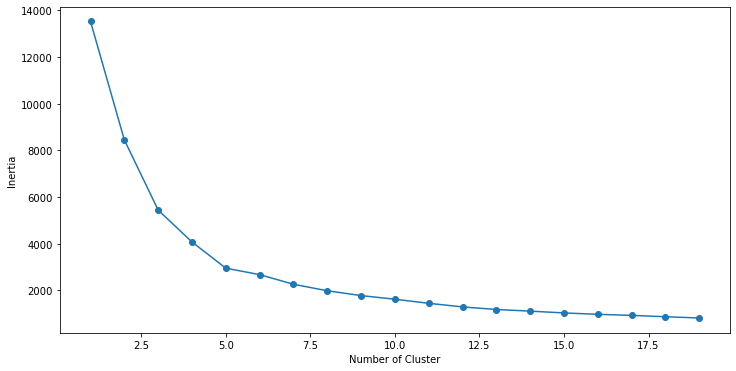

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')

Pada gambar di atas, terlihat siku berada di jumlah cluster = 5
sehinga dapat dari gamabr berikut, dapat diketahui bahwa jumlah cluster yg optimal adalah 5
kemudian dicek lagi nilai inertia

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaled)
kmeans.inertia_

2950.989036625399

## Evaluasi Model

Pada tahap ini akan diketai persebaran dari masing-masing cluster (melihat berapa jumlah anggota untuk setiao cluster)

In [28]:
pred = kmeans.predict(data_scaled)

In [29]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame.head()

,0,1,2,3,4,5,6,7,8,cluster
0,-0.253481,-0.259382,-0.155483,-0.256641,-0.363599,-0.383400,-0.394098,-0.15757,-0.455357,0
1,-0.253889,-0.259382,-0.155483,-0.256641,-0.226819,-0.383400,-0.394098,-0.15757,-0.347786,0
2,-0.235263,-0.259382,-0.155483,-0.256641,-0.226819,-0.368483,-0.394098,-0.15757,-0.347786,0
3,-0.253889,-0.259382,-0.155483,-0.256641,-0.266885,-0.383400,-0.394098,-0.15757,-0.379187,0
4,-0.253889,-0.259382,-0.155483,-0.256641,-0.286927,-0.383400,-0.394098,-0.15757,-0.395042,0


In [31]:
frame['cluster'].value_counts()

0    1386
1      54
3      46
2       9
4       7
Name: cluster, dtype: int64

Jumlah anggota cluter 1 : 1386

Jumlah anggota cluter 2 : 9

Jumlah anggota cluter 3 : 46

Jumlah anggota cluter 4 : 7

Jumlah anggota cluter 5 : 54

In [32]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=1000, n_clusters=5, n_jobs=None, precompute_distances='auto')

Mencari pusat cluster

In [33]:
kmeans.cluster_centers_

array([[-0.17722697, -0.17678336, -0.14212629, -0.1575724 , -0.15293979,
        -0.20506419, -0.20896764, -0.12765282, -0.19781627],
       [ 0.44426566,  0.46710813,  0.32406813,  0.3683692 ,  0.18999503,
         3.54781921,  3.82374513,  1.17606464,  3.90489797],
       [ 9.92373132,  9.64288784, 11.18755166,  9.24906174,  7.93127833,
         0.74266941,  0.70332319,  0.74689864,  0.43640404],
       [ 2.61519981,  2.68071963,  1.09286155,  2.2904361 ,  2.67640366,
         0.65643949,  0.6692242 ,  0.37706732,  0.48752433],
       [ 1.71906602,  1.38554376,  4.07539546,  1.41454273,  1.03124818,
         7.96521337,  6.57609868, 12.76459078,  5.27930081]])

## Model Saving

Penyimpanan model untuk kemudian di-deploy ke heroku

In [34]:
import pickle

In [35]:
pickle.dump(kmeans,open('model_clustering_FP.pkl','wb'))

## Model Inference

Mengetes data untuk melihat berada di cluster mana

In [36]:
kmeans.predict(StandardScaler().fit_transform([[1000,1000,1000,1000,1000,1000,1000,1000,1000]]))

array([0])

ada di cluter 1

## Kesimpulan

KESIMPULAN 1
pusat untuk masing-masing cluster adalah:
1. cluster 1 :[-0.17702357, -0.17654853, -0.14213592, -0.15533986, -0.15114955,-0.20508062, -0.2089733 , -0.12767439,-0.19718245]
2. cluster 2 :[ 0.44426566,  0.46710813,  0.32406813,  0.3683692 ,  0.18999503,3.54781921,  3.82374513,  1.17606464,  3.90489797]
3. cluster 3 :[ 9.92373132,  9.64288784, 11.18755166,  9.24906174,  7.93127833,0.74266941,  0.70332319,  0.74689864,  0.43640404]
4. cluster 4 :[ 2.67098452,  2.73698163,  1.12060255,  2.2760244 ,  2.68409879,0.67609021,  0.68891397,  0.38894815,  0.48321846]
5. cluster 5 :[ 1.71906602,  1.38554376,  4.07539546,  1.41454273,  1.03124818,7.96521337,  6.57609868, 12.76459078, 5.27930081]]

dengan susunan kolom adalah :
1. total_vaccinations
2. people_vaccinated
3. people_fully_vaccinated
4. daily_vaccinations_raw
5. daily_vaccinations
6. total_vaccinations_per_hundred
7. people_vaccinated_per_hundred
8. people_fully_vaccinated_per_hundred
9. daily_vaccinations_per_million


KESIMPULAN 2 : negara dengan progress vaksinasi lambat dilihat dari kolom total_vaccinations dan people_vaccinated adalah:
1. Ecuador
2. Kuwait
3. Isle of Man
4. Panama
5. Luxembourg


KESIMPULAN 3 :WHO harus memberikan perlakuan khusus kepada 5 negara tersebut sehingga progress vaksinasi menjadi lebih cepat dan penambahan kasus Covid-19 dapat dicegah. Perlakuan khusus tersebut dapat berupa:
1. penyulusahan sistem vaksinasi
2. benchmark negara dengan sistem vaksinasi yang cepat
3. bantuan proses pengadaan vaksin
4. sosialisasi dengan tetap menjaga protkol kesehatan meskipun sudah divaksin.

Sesuai denga objective yaitu mempercepat progress vaksinasi dengan outcome jumlah kasus semakin menurun.